In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!cp '/content/drive/My Drive/Colab Notebooks/YELP_LSTM.ipynb' '/content/drive/MyDrive/Tutorial_Deep_Learning_YT/YELP_LSTM.ipynb'

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU, LSTM, Input
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
max_words = 15000
max_review_len = 200

In [6]:
!wget https://www.dropbox.com/s/ufbhk3kadtnn6h0/yelp_review_polarity_csv.tgz?dl=1 -O yelp_review_polarity_csv.tgz

--2024-10-08 21:33:20--  https://www.dropbox.com/s/ufbhk3kadtnn6h0/yelp_review_polarity_csv.tgz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/sgq60jwaouo41mfcu2sfd/yelp_review_polarity_csv.tgz?rlkey=z1m2xi1qo8ai4uar6y2qfc7l7&dl=1 [following]
--2024-10-08 21:33:21--  https://www.dropbox.com/scl/fi/sgq60jwaouo41mfcu2sfd/yelp_review_polarity_csv.tgz?rlkey=z1m2xi1qo8ai4uar6y2qfc7l7&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8877bccdf8a5ff02601728198c.dl.dropboxusercontent.com/cd/0/inline/CcGONY_hsYAmce0kWDpZSRS3g8HBBYaGrA-UT9ixFPkfy-a4G9Ihph_1snjAf4gohPe2WOG1Y1pK8DmAm8j-e1WvjZFHFg4b1NxKuHZesijzXTeTC6JCH9VsIouvuXF_oVM/file?dl=1# [following]
--2024-10-08 21:33:21--  https://uc8877bccdf8a5ff02

In [7]:
!tar -xvf yelp_review_polarity_csv.tgz

yelp_review_polarity_csv/
yelp_review_polarity_csv/train.csv
yelp_review_polarity_csv/readme.txt
yelp_review_polarity_csv/test.csv


In [8]:
!cat yelp_review_polarity_csv/readme.txt

Yelp Review Polarity Dataset

Version 1, Updated 09/09/2015

ORIGIN

The Yelp reviews dataset consists of reviews from Yelp. It is extracted from the Yelp Dataset Challenge 2015 data. For more information, please refer to http://www.yelp.com/dataset_challenge

The Yelp reviews polarity dataset is constructed by Xiang Zhang (xiang.zhang@nyu.edu) from the above dataset. It is first used as a text classification benchmark in the following paper: Xiang Zhang, Junbo Zhao, Yann LeCun. Character-level Convolutional Networks for Text Classification. Advances in Neural Information Processing Systems 28 (NIPS 2015).


DESCRIPTION

The Yelp reviews polarity dataset is constructed by considering stars 1 and 2 negative, and 3 and 4 positive. For each polarity 280,000 training samples and 19,000 testing samples are take randomly. In total there are 560,000 trainig samples and 38,000 testing samples. Negative polarity is class 1, and positive class 2.

The files train.csv and test.csv contain all the

In [9]:
!head yelp_review_polarity_csv/train.csv

"1","Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply never answers the phone.  It usually takes 2 hours of repeated calling to get an answer.  Who has time for that or wants to deal with it?  I have run into this problem with many other doctors and I just don't get it.  You have office workers, you have patients with medical needs, why isn't anyone answering the phone?  It's incomprehensible and not work the aggravation.  It's with regret that I feel that I have to give Dr. Goldberg 2 stars."
"2","Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He's been great over the years and is really all about the big picture. It is because of him, not my now former gyn Dr. Markoff, that I found out I have fibroids. He explores all options with you and is very patient and understanding. H

In [10]:
train = pd.read_csv('yelp_review_polarity_csv/train.csv',
                    header=None,
                    names=['Class', 'Review'])

In [12]:
reviews = train['Review']

In [14]:
y_train = train['Class'] - 1
y_train.unique()

array([0, 1])

In [15]:
reviews.head()

,Review
0,"Unfortunately, the frustration of being Dr. Go..."
1,Been going to Dr. Goldberg for over 10 years. ...
2,I don't know what Dr. Goldberg was like before...
3,I'm writing this review to give you a heads up...
4,All the food is great here. But the best thing...


In [16]:
tokenizer = Tokenizer(num_words=max_words)


In [17]:
tokenizer.fit_on_texts(reviews)

In [19]:
sequences = tokenizer.texts_to_sequences(reviews)

In [20]:
X_train = pad_sequences(sequences, maxlen=max_review_len)

In [21]:
test = pd.read_csv('yelp_review_polarity_csv/test.csv',
                    header=None,
                    names=['Class', 'Review'])
test_reviews = test['Review']
y_test = test['Class'] - 1
test_sequences = tokenizer.texts_to_sequences(test_reviews)
X_test = pad_sequences(test_sequences, maxlen=max_review_len)

In [30]:
model = Sequential([
    Input(shape=(max_review_len,)),
    Embedding(max_words, 64),
    LSTM(128),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
history = model.fit(X_train,
                    y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/5
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 69s 16ms/step - accuracy: 0.8934 - loss: 0.2550 - val_accuracy: 0.9597 - val_loss: 0.1082
Epoch 2/5
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 80s 16ms/step - accuracy: 0.9549 - loss: 0.1226 - val_accuracy: 0.9607 - val_loss: 0.1051
Epoch 3/5
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 64s 16ms/step - accuracy: 0.9644 - loss: 0.0983 - val_accuracy: 0.9586 - val_loss: 0.1082
Epoch 4/5
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 82s 16ms/step - accuracy: 0.9721 - loss: 0.0777 - val_accuracy: 0.9640 - val_loss: 0.0989
Epoch 5/5
3938/3938 ━━━━━━━━━━━━━━━━━━━━ 64s 16ms/step - accuracy: 0.9789 - loss: 0.0609 - val_accuracy: 0.9631 - val_loss: 0.1040


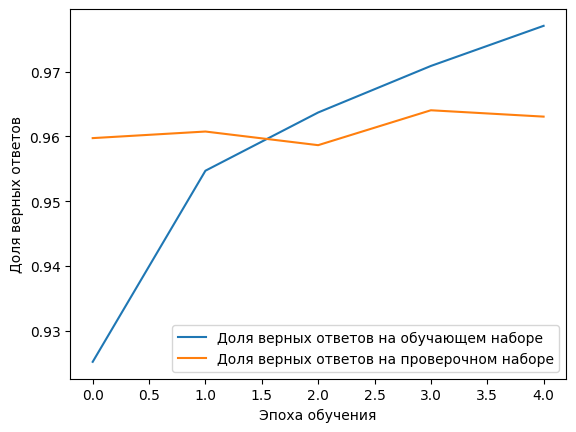

In [32]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [33]:
model.evaluate(X_test, y_test, verbose=1)

1188/1188 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9546 - loss: 0.1281


[0.12812429666519165, 0.9549999833106995]

# **Marking tonality by our review**

In [34]:
data = """I decided to leave a review about a restaurant I recently visited to warn other visitors about possible troubles. The service was unsatisfactory: the waiters were slow and inattentive, forgot to take orders or write them down. It was inconvenient and distracting from eating. The food also did not meet expectations: some dishes were over-salted or undercooked, the choice of snacks and salads was limited. It was especially unpleasant to find foreign objects in the salad, which indicated the negligence of the staff. The interior of the restaurant also left much to be desired: the furniture was old and shabby, which created a feeling of unkemptness. In general, the visit left an extremely negative impression. I do not recommend visiting it, as there are many other establishments with better service and food quality."""

In [35]:
sequence = tokenizer.texts_to_sequences([data])

In [36]:
data = pad_sequences(sequence, maxlen=max_review_len)

In [37]:
result = model.predict(data)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


array([[3.5335892e-05]], dtype=float32)

In [38]:
data2 = """I thank the pizzeria restaurant for the excellent service and excellent cuisine! The staff was attentive and helpful, the waiters quickly took orders and brought dishes. The food exceeded all expectations: the dishes were perfectly cooked, the choice of appetizers and salads was amazing in variety, and each dish was a masterpiece. The interior of the restaurant left a pleasant impression: the cozy atmosphere, beautiful furniture and stylish design created an atmosphere of warmth and comfort. I recommend the restaurant for an unforgettable experience and enjoying delicious food."""
sequence = tokenizer.texts_to_sequences([data2])
data = pad_sequences(sequence, maxlen=max_review_len)
result = model.predict(data)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[0.9999411]], dtype=float32)